#### Exercise meanshift
1. load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 Petal columns. Now we are left with a 2D feature space
2. get unique labels (Species column)
3. plot with a scatter plot each iris flower sample colored by label (3 different colors)image.png
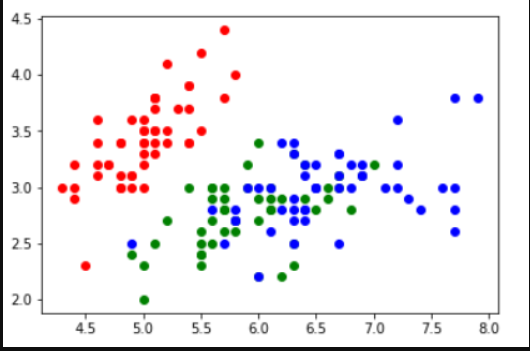
4. use: MeanShift and estimate_bandwidth from sklearn.cluster to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: quantile set it to 0.2 for best result)
5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function)
6. create a new scatter plot where each flower is colored according to cluster label
7. add a dot for the cluster centers
8. Compare the 2 plots (colored by actual labels vs. colored by cluster label)
9. Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.

## Status
#### All Exercises are completed

In [1]:
# 1.0: load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 Petal columns. Now we are left with a 2D feature space
import pandas as pd;
URL = '../data/iris_data.csv'
data = pd.read_csv(URL, decimal=",")
df = data.drop(['Petal length', 'Petal width'], axis=1)
df.head()

,Sepal length,Sepal width,Species
0,5.1,3.5,I. setosa
1,4.9,3.0,I. setosa
2,4.7,3.2,I. setosa
3,4.6,3.1,I. setosa
4,5.0,3.6,I. setosa


In [2]:
# 2.0: get unique labels (Species column)
import numpy as np

unique = np.unique(df['Species'])
print(unique)

['I. setosa' 'I. versicolor' 'I. virginica']


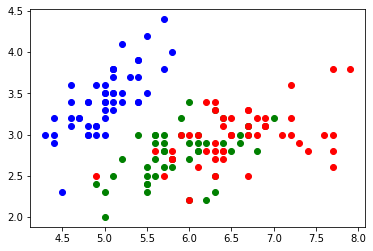

In [3]:
# 3.0: plot with a scatter plot each iris flower sample colored by label (3 different colors)
from itertools import cycle
import matplotlib.pyplot as plt

colors = cycle('bgrcmy')
for k, col in zip(unique, colors):
    filter_data = (df['Species'] == k)
    # nedenstående betyder at vi lægger dette filter til Sepal length og Sepal width dataframet.
    plt.scatter(df['Sepal length'][filter_data], df['Sepal width'][filter_data], color=col)

In [4]:
# 4.0 use: MeanShift and estimate_bandwidth from sklearn.cluster to first estimate bandwidth and then get the clusters
# (HINT: estimate_bandwidth() takes an argument: quantile set it to 0.2 for best result)
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X=df.drop('Species', axis=1), quantile=0.2)

ms = MeanShift(bandwidth=bandwidth)

ms.fit(df.drop('Species', axis=1))
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters = len(labels_unique)

print('Number of estimated clusters : {}'.format(n_clusters)) 

Number of estimated clusters : 3


In [5]:
# 5.0 print out labels, cluster centers and number of clusters (as returned from the MeanShift function):
print("labels:\n", labels, "\ncluster centers:\n", cluster_centers, "\n number of clusters:\n", n_clusters)

labels:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 2 0 0 2 1 2 0 2 0
 0 0 0 0 0 0 2 2 0 0 0 2 0 0 2 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0] 
cluster centers:
 [[6.08727273 2.90181818]
 [5.         3.37692308]
 [7.6        3.73333333]] 
 number of clusters:
 3


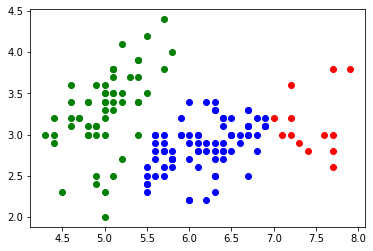

In [6]:
# 6.0 create a new scatter plot where each flower is colored according to cluster label
colors = cycle('bgrcmy')
df['cluster_label'] = ms.labels_
for k, col in zip(labels_unique, colors):
    filter_data = (df['cluster_label'] == k)
    # nedenstående betyder at vi lægger dette filter til Sepal length og Sepal width dataframet.
    
    plt.scatter(df['Sepal length'][filter_data], df['Sepal width'][filter_data], c=col)

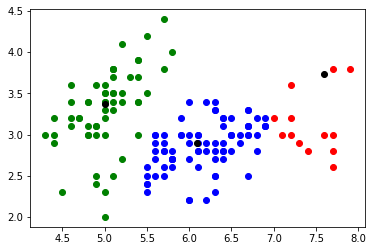

In [7]:
# 7.0 add a dot for the cluster centers
colors = cycle('bgrcmy')
df['cluster_label'] = ms.labels_
for k, col in zip(labels_unique, colors):
    filter_data = (df['cluster_label'] == k)
    # nedenstående betyder at vi lægger dette filter til Sepal length og Sepal width dataframet.
    cluster_center = cluster_centers[k]
    
    plt.scatter(df['Sepal length'][filter_data], df['Sepal width'][filter_data], c=col)
    plt.scatter(cluster_center[0], cluster_center[1], c='k')

In [8]:
# 8.0 Compare the 2 plots (colored by actual labels vs. colored by cluster label)
# ANSWER: (the comparison is between task 3.0 and 6.0):
# The actual label plot shows the flowers by Species, and the cluster label plot shows the clusters grouped together in the data(?)

Number of estimated clusters : 5
labels:
 [1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 3 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 3 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 3 0 0 0 0 3 0 0 0 2 0 0 2 3 2 0 4 0
 0 0 0 0 0 0 4 2 0 0 0 2 0 0 2 0 0 0 2 2 4 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0] 
cluster centers:
 [[6.14576271 2.9220339  0.        ]
 [5.         3.37692308 1.        ]
 [7.39       2.95       2.        ]
 [4.94285714 2.38571429 1.        ]
 [7.6        3.73333333 2.        ]] 
 number of clusters:
 5


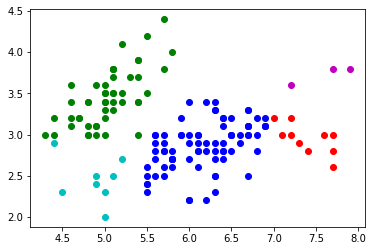

In [9]:
# 9.0 Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X=df.drop('Species', axis=1), quantile=0.15)

ms = MeanShift(bandwidth=bandwidth)

ms.fit(df.drop('Species', axis=1))
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters = len(labels_unique)

print('Number of estimated clusters : {}'.format(n_clusters)) 

print("labels:\n", labels, "\ncluster centers:\n", cluster_centers, "\n number of clusters:\n", n_clusters)
colors = cycle('bgrcmy')
df['cluster_label'] = ms.labels_
for k, col in zip(labels_unique, colors):
    filter_data = (df['cluster_label'] == k)
    # nedenstående betyder at vi lægger dette filter til Sepal length og Sepal width dataframet.
    plt.scatter(df['Sepal length'][filter_data], df['Sepal width'][filter_data], c=col)

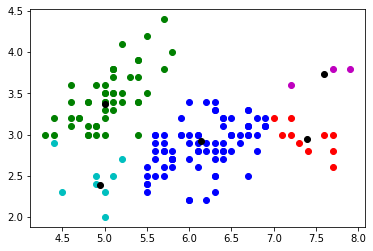

In [10]:
colors = cycle('bgrcmy')
df['cluster_label'] = ms.labels_
for k, col in zip(labels_unique, colors):
    filter_data = (df['cluster_label'] == k)
    # nedenstående betyder at vi lægger dette filter til Sepal length og Sepal width dataframet.
    cluster_center = cluster_centers[k]
    
    plt.scatter(df['Sepal length'][filter_data], df['Sepal width'][filter_data], c=col)
    plt.scatter(cluster_center[0], cluster_center[1], c='k')